In [78]:
import pandas as pd
# Imports
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA



from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# Load the data from CSV files into DataFrames
zone_data_1A = pd.read_csv('zone_data_1A_clustered.csv', nrows=40000)
zone_data_7 = pd.read_csv('zone_data_7_clustered.csv')
zone_data_6 = pd.read_csv('zone_data_6_clustered.csv')

# Separate zone_data_1A into two different DataFrames based on the cluster assignment
zone_data_1A_top = zone_data_1A[zone_data_1A['Cluster'] == 0]
zone_data_1A_bottom = zone_data_1A[zone_data_1A['Cluster'] == 1]

zone_data_7_top = zone_data_7[zone_data_7['Cluster'] == 0]
zone_data_7 = zone_data_7[zone_data_7['Cluster'] == 1]

zone_data_6_top = zone_data_6[zone_data_6['Cluster'] == 1]
zone_data_6 = zone_data_6[zone_data_6['Cluster'] == 0]

# Copy the data to avoid SettingWithCopyWarning
zone_data_1A_top_sorted = zone_data_1A_top.copy()
zone_data_1A_bottom_sorted = zone_data_1A_bottom.copy()

# Copy the data for zone 6 and zone 7 to avoid SettingWithCopyWarning
zone_data_6_top_sorted = zone_data_6_top.copy()
zone_data_6_bottom_sorted = zone_data_6.copy()

zone_data_7_top_sorted = zone_data_7_top.copy()
zone_data_7_bottom_sorted = zone_data_7.copy()

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_1A_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_1A_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_6_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_6_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)

zone_data_7_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_7_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)






/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary for Top Cluster:
                               SARIMAX Results                                
Dep. Variable:       Price Per ML ($)   No. Observations:                10124
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -72801.520
Date:                Sat, 11 May 2024   AIC                         145615.040
Time:                        22:08:54   BIC                         145658.376
Sample:                             0   HQIC                        145629.700
                              - 10124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2537.0003    469.662      5.402      0.000    1616.479    3457.521
ar.L1          0.2575      0.118      2.187      0.029       0.027       0.488
ar.L2          

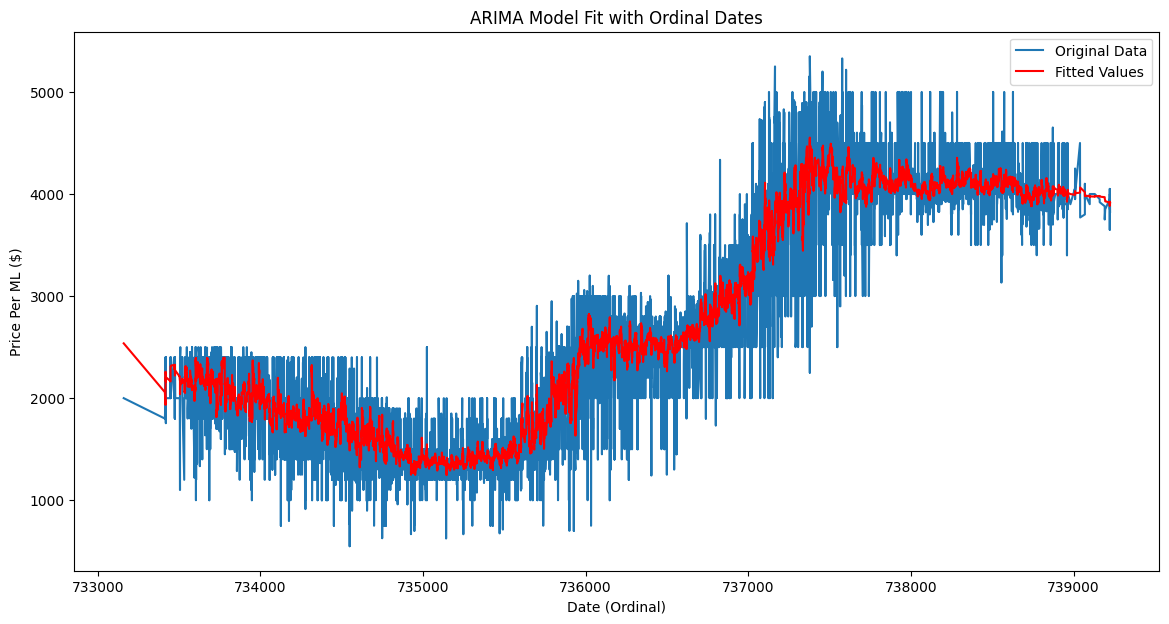

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


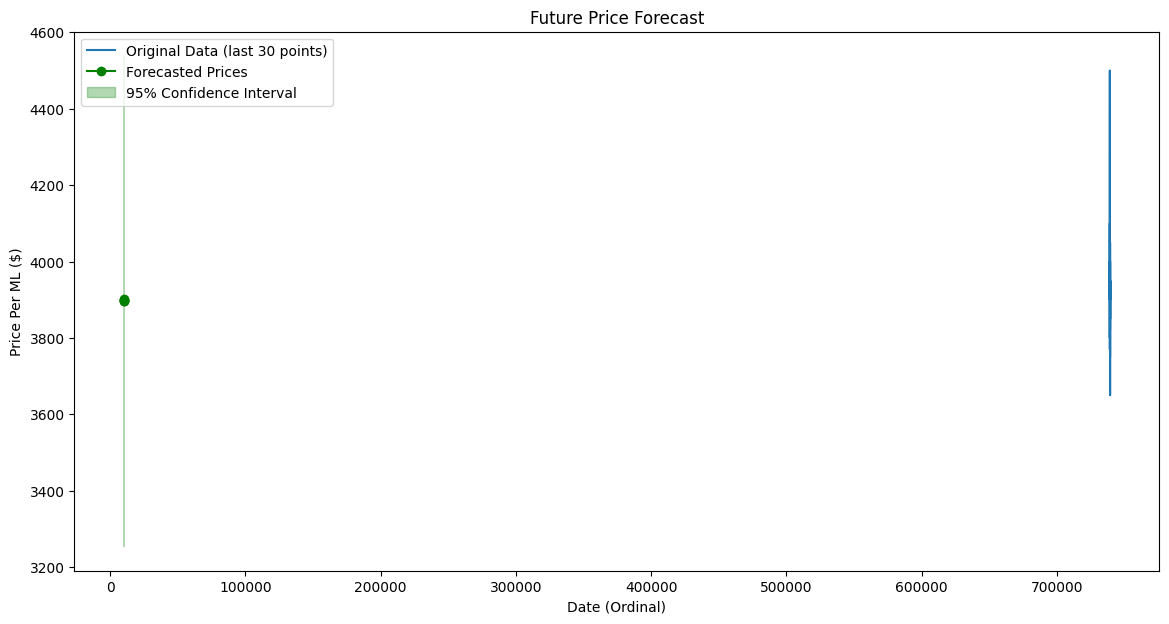

In [75]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

series_top = zone_data_1A_top_sorted.set_index('Create_date_ordinal')['Price Per ML ($)']

# Fit the ARIMA model to the data
arima_model_top = ARIMA(series_top, order=(2, 0, 2))
fitted_model_top = arima_model_top.fit()

# Print the summary of the model
print("ARIMA Model Summary for Top Cluster:")
print(fitted_model_top.summary())

# Plot the original data and the fitted values
plt.figure(figsize=(14, 7))
plt.plot(series_top.index, series_top, label='Original Data')
plt.plot(series_top.index, fitted_model_top.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit with Ordinal Dates')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Price Per ML ($)')
plt.legend()
plt.show()

# Forecast future prices
n_steps = 5  # Number of steps to forecast
forecast = fitted_model_top.get_forecast(steps=n_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting the forecast alongside the original series
plt.figure(figsize=(14, 7))
plt.plot(series_top.index[-30:], series_top[-30:], label='Original Data (last 30 points)')
plt.plot(forecast_mean.index, forecast_mean, color='green', marker='o', label='Forecasted Prices')
plt.fill_between(forecast_mean.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.3, label='95% Confidence Interval')
plt.title('Future Price Forecast')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Price Per ML ($)')
plt.legend()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


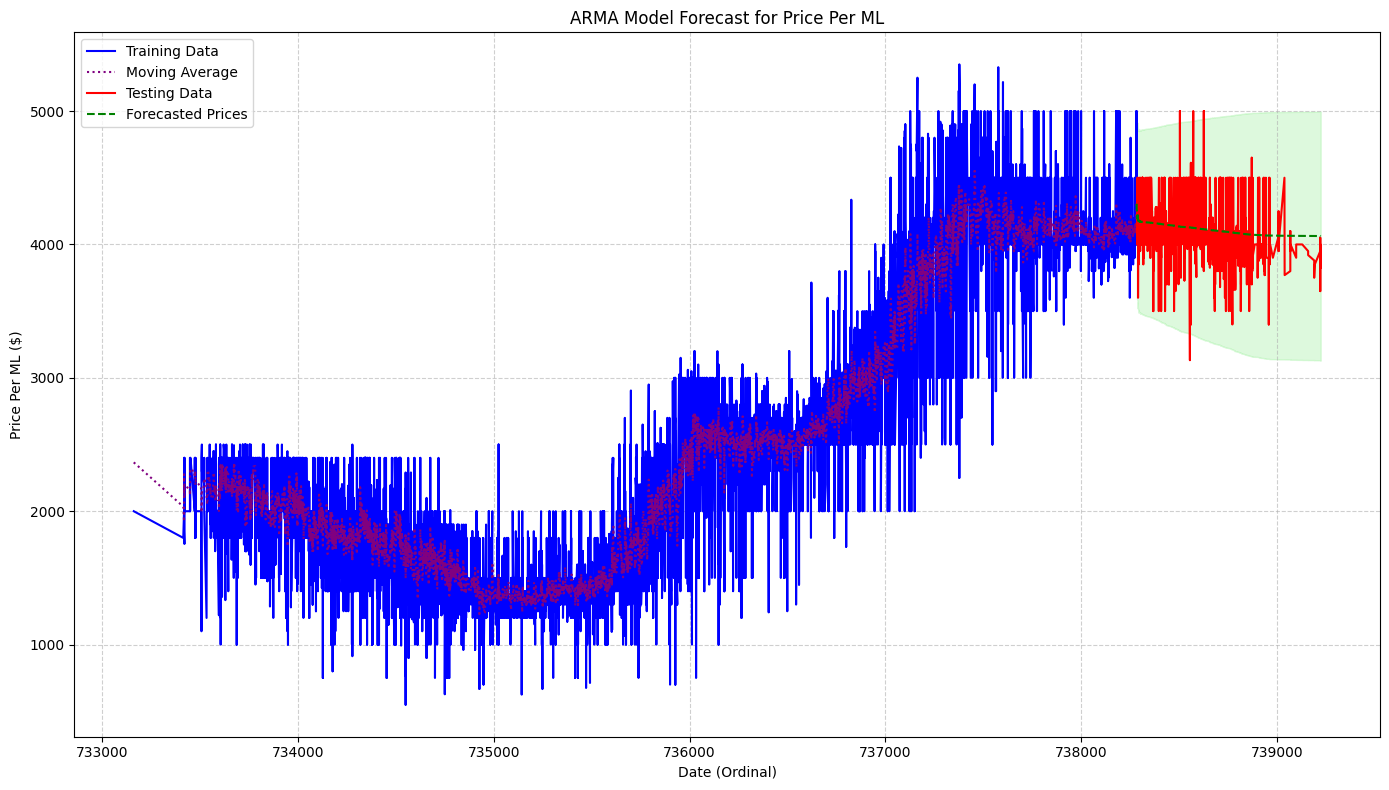

Confidence intervals generated successfully.
Model Summary:
                               SARIMAX Results                                
Dep. Variable:       Price Per ML ($)   No. Observations:                 9111
Model:               ARIMA(10, 0, 10)   Log Likelihood              -65686.675
Date:                Sat, 11 May 2024   AIC                         131417.350
Time:                        22:09:27   BIC                         131573.929
Sample:                             0   HQIC                        131470.598
                               - 9111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2366.2352   1708.930      1.385      0.166    -983.206    5715.677
ar.L1         -0.0048      0.578     -0.008      0.993      -1.138     

In [76]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def build_arma_model(data, order):
    from statsmodels.tsa.arima.model import ARIMA
    # ARMA model is a special case of ARIMA with no differencing (d=0)
    model = ARIMA(data, order=(order[0], order[1], order[2]))
    fitted_model = model.fit()
    return fitted_model

def forecast_and_simulate(model, steps=1000):
    # Get the forecast result
    forecast_result = model.get_forecast(steps=steps)
    forecast_mean = forecast_result.predicted_mean

    # Convert MultiIndex DataFrame to standard column format
    conf_intervals = forecast_result.conf_int()
    conf_intervals.columns = ['lower', 'upper']

    return forecast_mean, conf_intervals

# Assuming the 'Price Per ML ($)' column contains the data of interest
series_data = zone_data_1A_top_sorted.set_index('Create_date_ordinal')['Price Per ML ($)']

# Split data into training and testing sets using train_test_split
# Note: shuffle=False is crucial for time series data to maintain the temporal order
train_data, test_data = train_test_split(series_data, test_size=0.1, shuffle=False)

# Build ARMA model on training data
arma_model = build_arma_model(train_data, order=(10, 0, 10))

# Simulate future prices on test data
forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))

# Visualization
plt.figure(figsize=(14, 8))

# Plot training data
plt.plot(train_data.index, train_data, label="Training Data", color='blue')

# Plot moving average line using fitted values
plt.plot(train_data.index, arma_model.fittedvalues, label="Moving Average", color='purple', linestyle=':')


# Plot testing data
plt.plot(test_data.index, test_data, label="Testing Data", color='red')

# Plot forecasted data
plt.plot(test_data.index, forecast_series, label="Forecasted Prices", linestyle='--', color='green')

# Fill between for confidence intervals
plt.fill_between(test_data.index, conf_df['lower'], conf_df['upper'], alpha=0.3, color='lightgreen')

# Add gridlines for clarity
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels and legend
plt.xlabel("Date (Ordinal)")
plt.ylabel("Price Per ML ($)")
plt.legend()

# Title and show plot
plt.title("ARMA Model Forecast for Price Per ML")
plt.tight_layout()
plt.show()

# Validate model parameters and convergence
if not arma_model.mle_retvals['converged']:
    print("Warning: Model did not converge. Check model parameters and data.")
else:
    print("Model converged successfully.")

# Validate forecast intervals
if conf_df['lower'].isnull().any() or conf_df['upper'].isnull().any():
    print("Warning: Confidence intervals contain null values. Check forecast outputs.")
else:
    print("Confidence intervals generated successfully.")
# Display model fit summary
print("Model Summary:")
print(arma_model.summary())

# Calculate and display error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors on the test data
mse = mean_squared_error(test_data, forecast_series)
mae = mean_absolute_error(test_data, forecast_series)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score
r_squared = r2_score(test_data, forecast_series)
print("R-squared:", r_squared)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be give

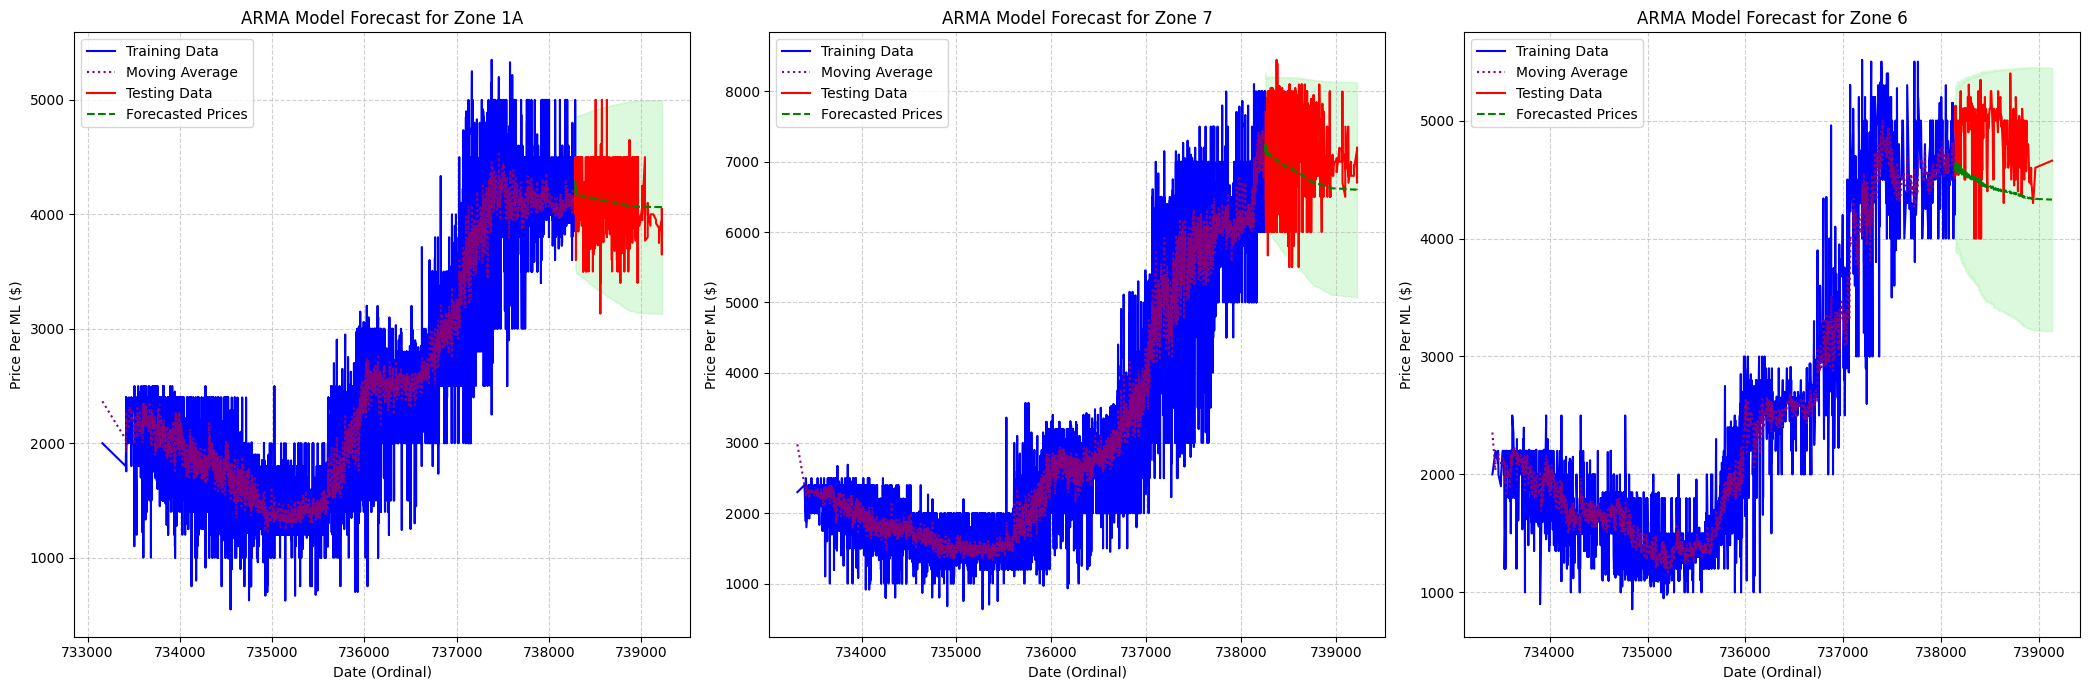

      Zone            MSE         MAE       R^2
0  Zone 1A   42462.313699  152.200018 -0.003466
1   Zone 7  473378.739380  595.792887 -0.671330
2   Zone 6  242617.271470  445.034699 -2.308604


In [80]:
zones = {
    'Zone 1A': zone_data_1A_top_sorted,
    'Zone 7': zone_data_7_top_sorted,
    'Zone 6': zone_data_6_top_sorted
}

stats_data = []

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))  # Adjusted for 3 columns

for i, (zone_name, zone_data) in enumerate(zones.items()):
    series_data = zone_data.set_index('Create_date_ordinal')['Price Per ML ($)']
    train_data, test_data = train_test_split(series_data, test_size=0.1, shuffle=False)
    
    arma_model = build_arma_model(train_data, order=(10, 0, 10))
    forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))
    
    # Calculate statistics
    mse = mean_squared_error(test_data, forecast_series)
    mae = mean_absolute_error(test_data, forecast_series)
    r_squared = r2_score(test_data, forecast_series)
    
    stats_data.append({
        'Zone': zone_name,
        'MSE': mse,
        'MAE': mae,
        'R^2': r_squared
    })
    
    ax = axes[i]
    ax.plot(train_data.index, train_data, label="Training Data", color='blue')
    ax.plot(train_data.index, arma_model.fittedvalues, label="Moving Average", color='purple', linestyle=':')
    ax.plot(test_data.index, test_data, label="Testing Data", color='red')
    ax.plot(test_data.index, forecast_series, label="Forecasted Prices", linestyle='--', color='green')
    ax.fill_between(test_data.index, conf_df['lower'], conf_df['upper'], alpha=0.3, color='lightgreen')
    ax.set_title(f"ARMA Model Forecast for {zone_name}")
    ax.set_xlabel("Date (Ordinal)")
    ax.set_ylabel("Price Per ML ($)")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Display statistics in a DataFrame
stats_df = pd.DataFrame(stats_data)
print(stats_df)

# ARIMA

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

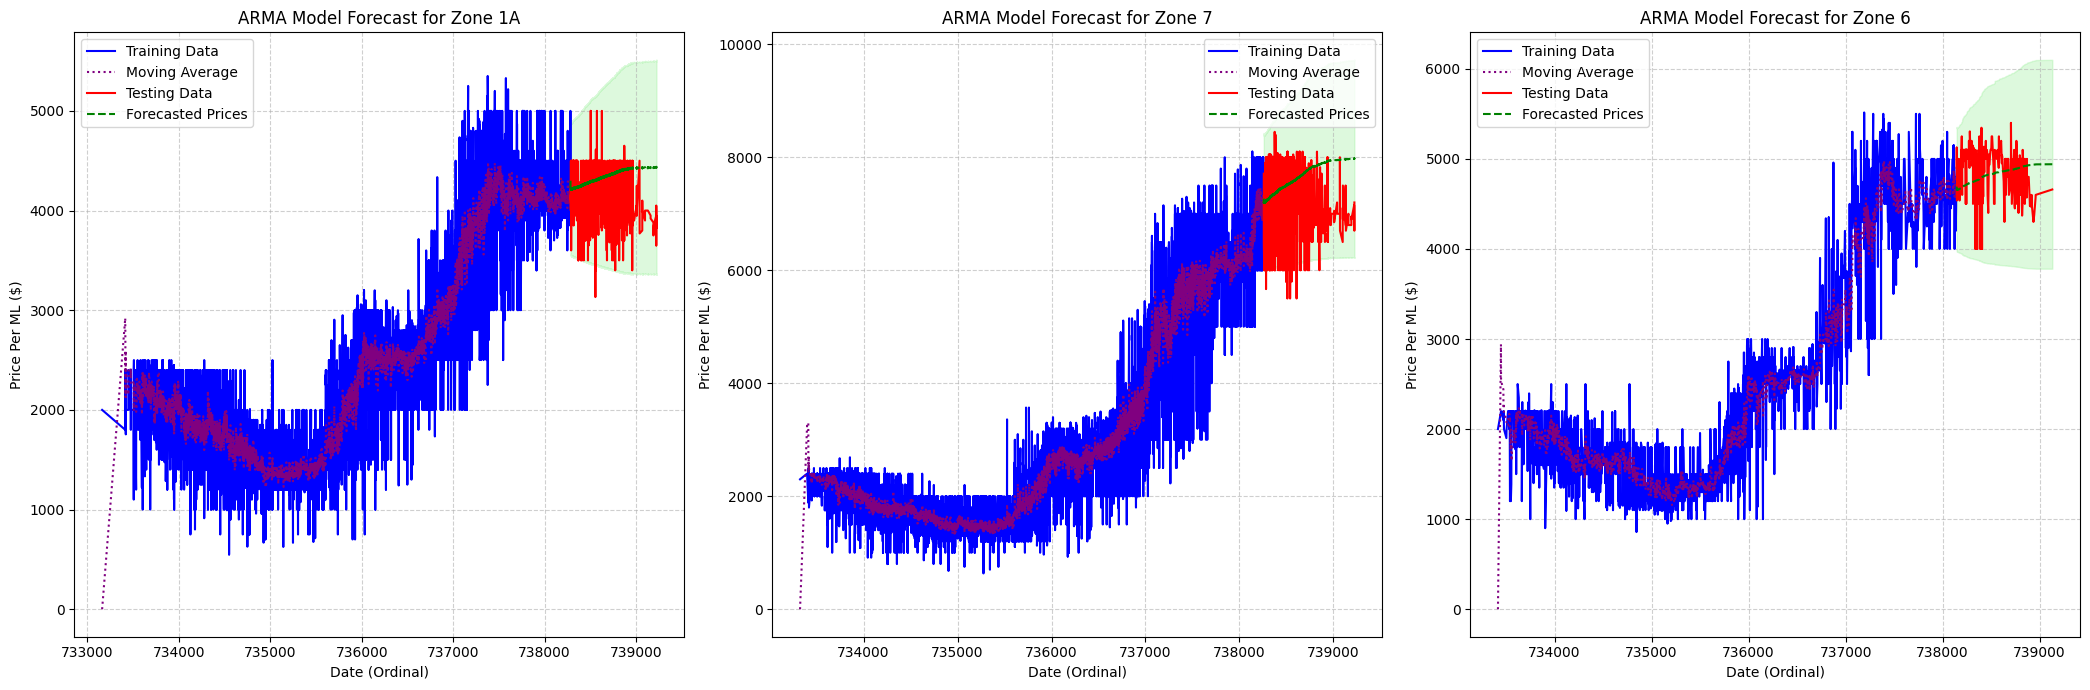

      Zone            MSE         MAE       R^2
0  Zone 1A  114535.579811  292.218169 -1.706694
1   Zone 7  460159.089096  537.841325 -0.624657
2   Zone 6   98434.883135  278.905397 -0.342370


In [82]:
zones = {
    'Zone 1A': zone_data_1A_top_sorted,
    'Zone 7': zone_data_7_top_sorted,
    'Zone 6': zone_data_6_top_sorted
}

stats_data = []

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))  # Adjusted for 3 columns

for i, (zone_name, zone_data) in enumerate(zones.items()):
    series_data = zone_data.set_index('Create_date_ordinal')['Price Per ML ($)']
    train_data, test_data = train_test_split(series_data, test_size=0.1, shuffle=False)
    
    arma_model = build_arma_model(train_data, order=(10, 2, 10))
    forecast_series, conf_df = forecast_and_simulate(arma_model, steps=len(test_data))
    
    # Calculate statistics
    mse = mean_squared_error(test_data, forecast_series)
    mae = mean_absolute_error(test_data, forecast_series)
    r_squared = r2_score(test_data, forecast_series)
    
    stats_data.append({
        'Zone': zone_name,
        'MSE': mse,
        'MAE': mae,
        'R^2': r_squared
    })
    
    ax = axes[i]
    ax.plot(train_data.index, train_data, label="Training Data", color='blue')
    ax.plot(train_data.index, arma_model.fittedvalues, label="Moving Average", color='purple', linestyle=':')
    ax.plot(test_data.index, test_data, label="Testing Data", color='red')
    ax.plot(test_data.index, forecast_series, label="Forecasted Prices", linestyle='--', color='green')
    ax.fill_between(test_data.index, conf_df['lower'], conf_df['upper'], alpha=0.3, color='lightgreen')
    ax.set_title(f"ARMA Model Forecast for {zone_name}")
    ax.set_xlabel("Date (Ordinal)")
    ax.set_ylabel("Price Per ML ($)")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Display statistics in a DataFrame
stats_df = pd.DataFrame(stats_data)
print(stats_df)